In [ ]:
import os

In [8]:
DATA_ROOT = os.path.join(os.getcwd(),"data")
MODEL_ROOT = os.path.join(os.getcwd(),"models")

In [9]:
from helper_functions.utils import Market1501Dataset, PersonReIDDataset

In [10]:
dataset_PersonReID_path = os.path.join(DATA_ROOT,"IUSTPersonReID")
dataset_Market1501_path = os.path.join(DATA_ROOT,"Market-1501-v15.09.15")

In [11]:
dataset_PersonReID_train = PersonReIDDataset(os.path.join(dataset_PersonReID_path,"bounding_box_train"))
dataset_PersonReID_test = PersonReIDDataset(os.path.join(dataset_PersonReID_path,"bounding_box_test"))

In [ ]:
print(f"Total images: {len(dataset_PersonReID_train)}")

# Show first few parsed entries
for i in range(5):
    sample = dataset_PersonReID_train[i]
    print(f"[{i}] person_id={sample['person_id']}, "
          f"camera_id={sample['camera_id']}, "
          f"frame_id={sample['frame_id']}, "
          f"path={sample['image_path']}")


Total images: 69164
[0] person_id=1, camera_id=c2s1, frame_id=24962, path=c:\Users\jokub\Desktop\Tiriamasis projektas\Tiriamasis\data\IUSTPersonReID\bounding_box_train\0001_c2s1_024962_01.jpg
[1] person_id=1, camera_id=c2s1, frame_id=24968, path=c:\Users\jokub\Desktop\Tiriamasis projektas\Tiriamasis\data\IUSTPersonReID\bounding_box_train\0001_c2s1_024968_01.jpg
[2] person_id=1, camera_id=c2s1, frame_id=24974, path=c:\Users\jokub\Desktop\Tiriamasis projektas\Tiriamasis\data\IUSTPersonReID\bounding_box_train\0001_c2s1_024974_01.jpg
[3] person_id=1, camera_id=c2s1, frame_id=24980, path=c:\Users\jokub\Desktop\Tiriamasis projektas\Tiriamasis\data\IUSTPersonReID\bounding_box_train\0001_c2s1_024980_01.jpg
[4] person_id=1, camera_id=c2s1, frame_id=24986, path=c:\Users\jokub\Desktop\Tiriamasis projektas\Tiriamasis\data\IUSTPersonReID\bounding_box_train\0001_c2s1_024986_01.jpg


2519


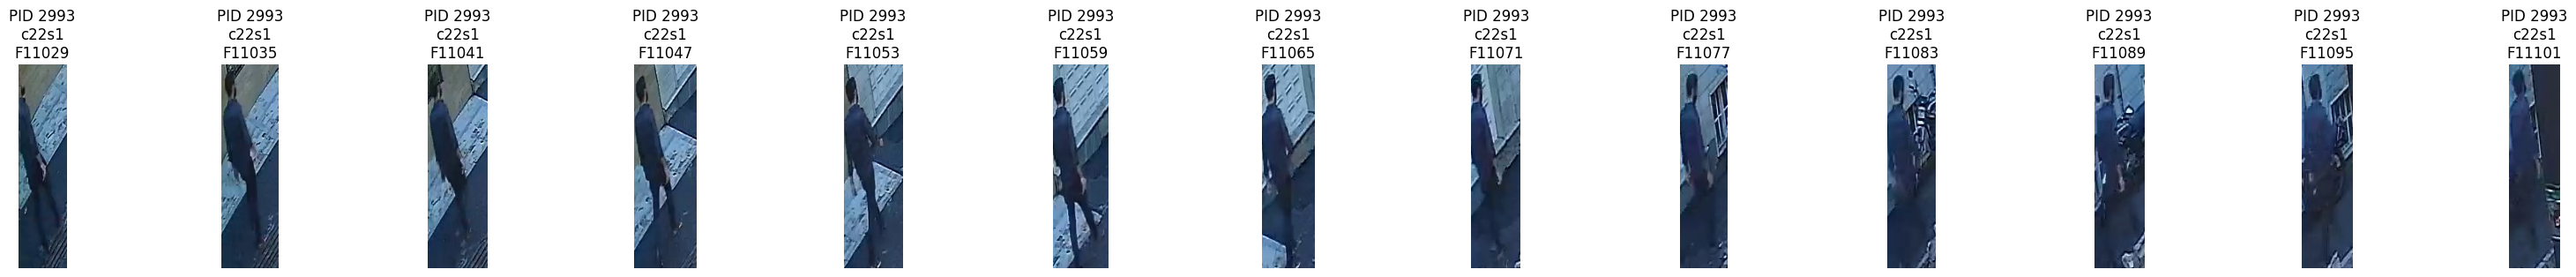

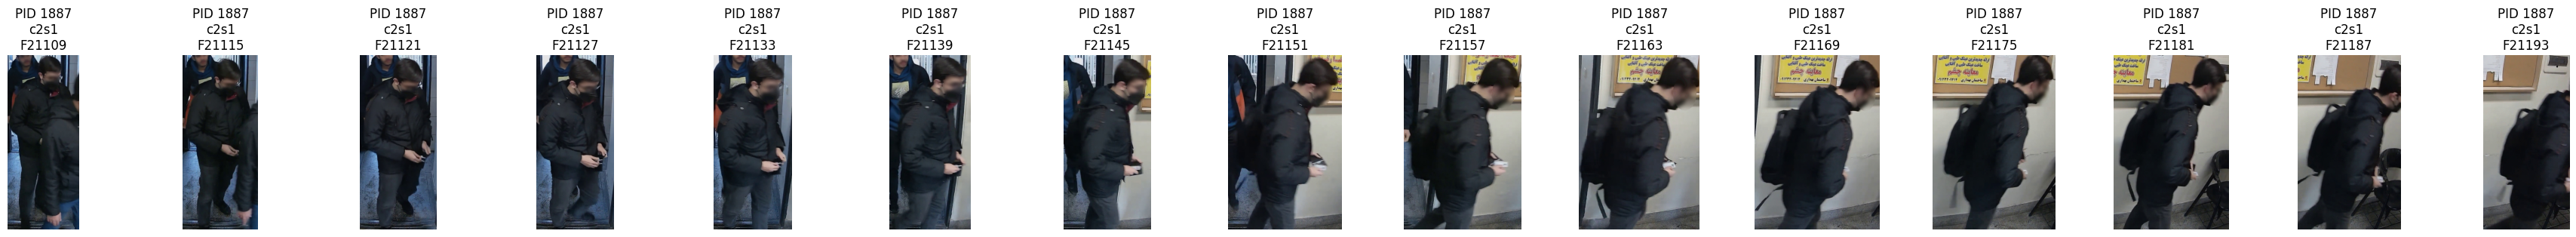

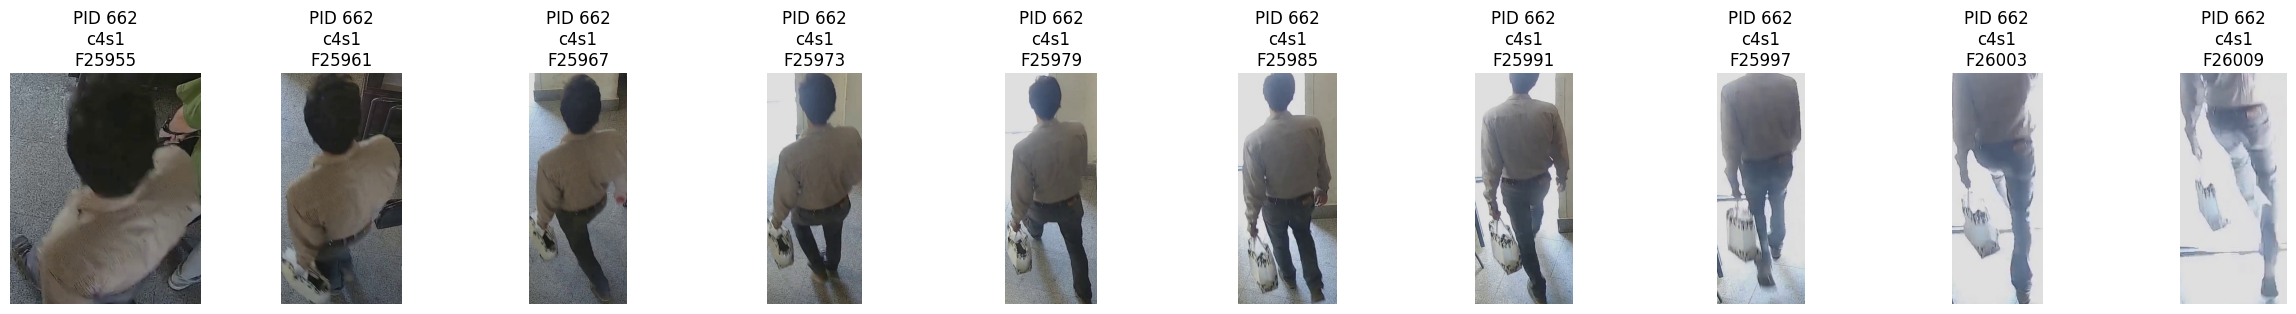

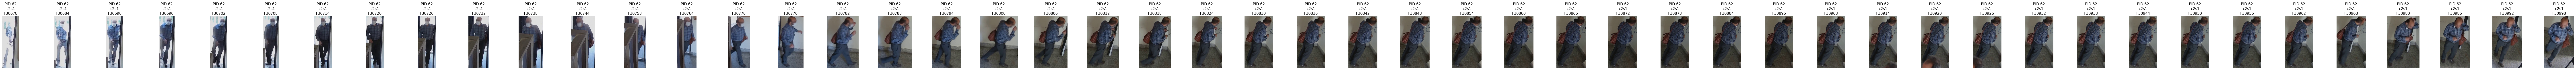

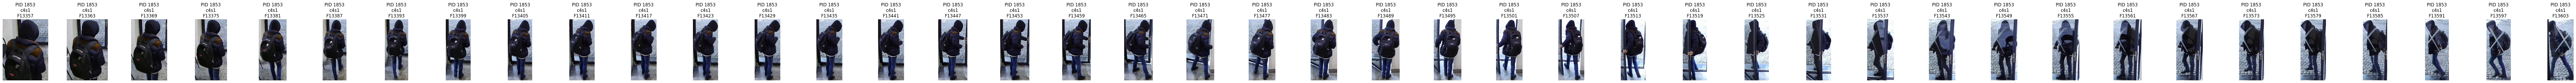

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

all_sequences = [seq for person_data in dataset_PersonReID_train.sequences_by_person.values() for cam_data in person_data.values() for seq in cam_data]

print(len(all_sequences))
sampled_sequences = random.sample(all_sequences, 5)

for i, seq in enumerate(sampled_sequences):
    fig, axes = plt.subplots(1, len(seq), figsize=(3 * len(seq), 3))

    for j, parsed_img in enumerate(seq):
        img = Image.open(parsed_img.image_path).convert('RGB')
        img = np.array(img)
        axes[j].imshow(img)
        axes[j].set_title(f"PID {parsed_img.person_id}\n{parsed_img.camera_id}\nF{parsed_img.frame_id}")
        axes[j].axis("off")
    plt.show()
